This is a Markdown


In [30]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import pandas as pd
import logging

%aimport -matplotlib
%aimport -pandas
%aimport -logging

import analysis.ks
import dataframe.calculations.spectrum
import visualize.dataframe
plt.style.use(['dark_background'])

print('Loading Imports')

directory = '/Users/davk/Documents/phd/projects/EvolvingNiches/runs/data/20D22_one_species_noise_g300_c012_i1_310x4_res/'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Loading Imports


In [31]:
%%script false --no-raise-error

print('Loading Encoded Spectra')
encoded_spectra = dataframe.calculations.spectrum.encoded_by_run_generation(message_file=directory + 'messages.parquet')
encoded_spectra.to_parquet(directory + 'encoded_spectrum.parquet')
print('Done Loading')

In [32]:
%%script false --no-raise-error

print('Loading Encoded Spectra')
received_spectra = dataframe.calculations.spectrum.received_by_run_generation(message_file=directory + 'messages.parquet')
received_spectra.to_parquet(directory + 'received_spectrum.parquet')

In [33]:
logging.basicConfig(level=logging.DEBUG, format='%(asctime)s - %(threadName)s - %(name)s - %(levelname)s - %(message)s')

rootlogger = logging.getLogger()
f = logging.Filter(name='evolvingniches')
logger = logging.getLogger('evolvingniches.run')
rootlogger.addFilter(f)

logger = logging.getLogger('evolvingniches.jupyter')

Reading Dir
Visualizing Spectrum
Visualizing Spectra


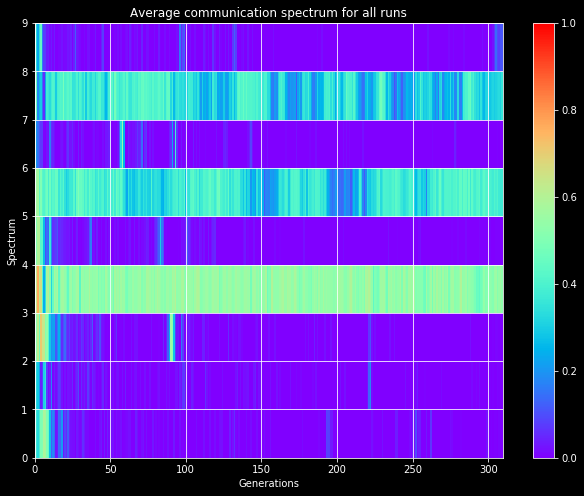

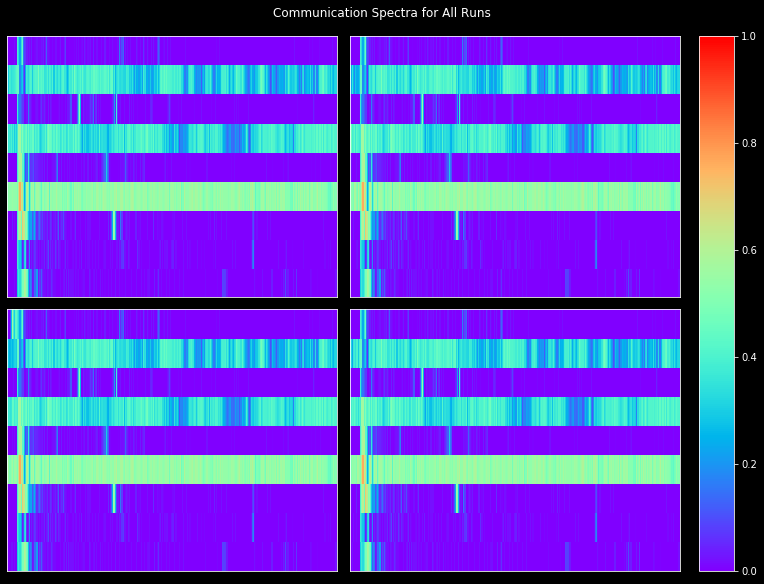

In [37]:
print('Reading Dir')
spectra = pd.read_parquet(directory + 'encoded_spectrum.parquet')

print('Visualizing Spectrum')
visualize.dataframe.plot_spectrum(spectra, vmin=0.0, vmax=1.0, view=True, filename=None)

print('Visualizing Spectra')
visualize.dataframe.plot_run_spectra(spectra, vmin=0.0, vmax=1.0, view=True, filename=None, shape=(2,2), base_run=104)

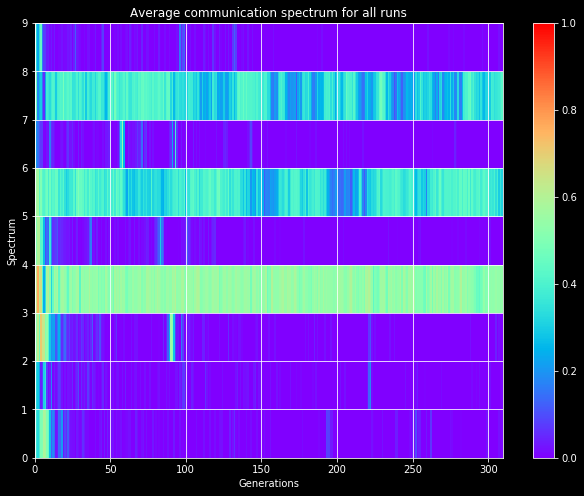

In [43]:
run = spectra.loc[((0,104), slice(None), slice(None)),:]
visualize.dataframe.plot_spectrum(run, vmin=0.0, vmax=1.0, view=True, filename=None)


In [ ]:
print('Reading Dir')
spectra = pd.read_parquet(directory + 'received_spectrum.parquet')
print('Visualizing Spectrum')
visualize.dataframe.plot_spectrum(spectra, vmin=0.0, vmax=1.0, view=True, filename=None)
print('Visualizing Spectra')
visualize.dataframe.plot_run_spectra(spectra, vmin=0.0, vmax=1.0, view=True, filename=None, shape=(5,5))

In [ ]:
last10 = dataframe.calculations.spectrum.specific_generation_over_runs(range(289,299), spectra=spectra)

visualize.dataframe.plot_channel_volume_histogram(last10, view=True, filename=None)

In [ ]:
%%script false --no-raise-error

ks_stat, ks_p = analysis.ks.kolmogorov_smirnov_matrix(last10)

stat_cluster_centers_indices, stat_labels = analysis.ks.kolmogorov_smirnov_clusters(ks_stat)
p_cluster_centers_indices, p_labels = analysis.ks.kolmogorov_smirnov_clusters(ks_p) 


